**Problem Statement:**

This analysis aims to clean and explore the U.S. General Services Administration's (GSA) "Time to Hire" dataset to identify key trends in hiring duration. Specifically, it will compute measures of central tendency, dispersion, and percentiles, and visualize hiring patterns through boxplots for the three states with the highest hires to assess variability and potential outliers.

**Methodology:**

**1.	Data Cleaning & Preparation:**

o	Handle missing or inconsistent values.

o	Convert date columns (e.g., RECEIVED_DATE, HIRED_DATE) into a standard datetime format.

o	Create a "Time to Hire" metric by calculating the duration between RECEIVED_DATE and HIRED_DATE.

o	Ensure numeric columns (APPLICATION_COUNT, HIRE_COUNT) are properly formatted.

**2.	Exploratory Data Analysis (EDA):**

o	Identify states with the highest HIRE_COUNT and filter data accordingly.

o	Compute summary statistics (mean, median, mode, standard deviation).

o	Determine percentiles (25th, 50th, 75th, 99th) to understand data distribution.


**3.	Visualization**:

o	Construct boxplots for the three states with the most hires, showcasing median hiring times, interquartile ranges, and outliers.

**4.	Analysis & Interpretation:**

o	Assess hiring trends based on statistical findings.

o	Identify potential inefficiencies or outliers in the hiring process.


In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Pandas as pd
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Github Projects/time-to-hire-data-file.xlsx'

# Load the data into a pandas DataFrame
df_tth = pd.read_excel(file_path)

# Display the first few rows of the dataset
df_tth.head()

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B


In [ ]:
#Obtain information on the dataframe
#Ensure that date columns are in datetime format
df_tth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239 entries, 0 to 6238
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DEPT_DESC          6239 non-null   object        
 1   DEPT_SHORT_DESC    6239 non-null   object        
 2   VACANCY            6239 non-null   object        
 3   APPLICATION_COUNT  6239 non-null   int64         
 4   HIRE_COUNT         6239 non-null   int64         
 5   RECEIVED_DATE      6239 non-null   datetime64[ns]
 6   APPROVED_DATE      6239 non-null   datetime64[ns]
 7   OPEN_DATE          6239 non-null   datetime64[ns]
 8   CLOSE_DATE         6239 non-null   datetime64[ns]
 9   ISSUE_DATE         6239 non-null   datetime64[ns]
 10  REFERRAL_RETURNED  6239 non-null   datetime64[ns]
 11  POS_OFFERED        6239 non-null   datetime64[ns]
 12  VAC_LOCATION       6239 non-null   object        
 13  HIRED_DATE         6239 non-null   datetime64[ns]
 14  SERIES  

In [ ]:
#Confirm that there are no null values
df_tth.isnull().sum()

,0
DEPT_DESC,0
DEPT_SHORT_DESC,0
VACANCY,0
APPLICATION_COUNT,0
HIRE_COUNT,0
RECEIVED_DATE,0
APPROVED_DATE,0
OPEN_DATE,0
CLOSE_DATE,0
ISSUE_DATE,0


In [ ]:
#Create a new column 'TIME_TO_HIRE'
df_tth['TIME_TO_HIRE']= df_tth['HIRED_DATE'] - df_tth['RECEIVED_DATE']
df_tth.head()

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days


In [ ]:
#Create a new colum 'STATE' for convience as'VAC_LOCATION' contains a lot of information
df_tth['STATE'] = df_tth['VAC_LOCATION'].astype(str).str[-2:]
df_tth.head()

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX


In [ ]:
# Create a column that is a serial number for each row
df_tth['ID'] = range(1, len(df_tth) + 1)

# Reorder columns to make 'ID' the first column
#Use List Comprehension over traditional for looping for efficiency
df_tth = df_tth[['ID'] + [col for col in df_tth.columns if col != 'ID']]

# Display the first few rows
df_tth.head()





,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,1,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
2,3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
3,4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
4,5,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX


In [29]:
#Identify which three states have the highest amount of hires using a pivot table
df_tth.pivot_table(index = 'STATE', values = 'HIRE_COUNT', aggfunc = 'sum').sort_values(by = 'HIRE_COUNT', ascending = False)

#note that the data for STATE and by extension VAC_LOCATION has some invalid vlaues such as au and ne. Ask the Data Engineer for calrification

,HIRE_COUNT
STATE,
CA,4934
TX,3735
DC,2059
MO,1678
IL,1028
...,...
ND,1
NC,1
RI,1


In [30]:
#confrim that the State column has invalid values
df_tth['STATE'].unique()

array(['TX', 'VA', 'CO', 'DC', 'CA', 'NY', 'MD', 'ND', 'PR', 'LA', 'OK',
       'MO', 'AR', 'AL', 'GA', 'FL', 'WA', 'IL', 'WY', 'MT', 'MA', 'PA',
       'MI', 'OH', 'NJ', 'IN', 'MN', 'WI', 'HI', 'AZ', 'OP', 'ME', 'VT',
       'OA', 'NH', 'OR', 'AK', 'CT', 'NV', 'US', 'NE', 'MS', 'TN', 'WV',
       'nd', 'IA', 'au', 'SD', 'NM', 'rk', 'on', 'ea', 'ax', 'ne', 'ia',
       'UT', 'KY', 'KS', 'ID', 'n,', 'ny', 'rn', 'RI', 'co', 'NC'],
      dtype=object)

In [31]:
#Given that the State column has more than 50 values (should only be 50 as there are only 50 states) clarification is needed on the other values
df_tth['STATE'].nunique()

65

In [32]:
#Create a new dataframe since I am only working with the top 3 states

#Create a pivot table of the top 3 states and assgin the value top_3_states
top_3_states = df_tth.pivot_table(index='STATE', values='HIRE_COUNT', aggfunc='sum')\
                      .sort_values(by='HIRE_COUNT', ascending=False)\
                      .head(3)\
                      .index.tolist()

#Filter and subset the df_tth DataFrame to keep only the top 3 states and assign the value df_top_3
df_top_3 = df_tth[df_tth['STATE'].isin(top_3_states)]

# Display the new DataFrame
df_top_3


,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,1,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
2,3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
3,4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
4,5,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,6233,(7P) Office of the Assist. Regional Administra...,7,0907139CFMP,19,1,2009-10-01,2009-09-30,2009-10-02,2009-10-31,2009-11-09 15:52:00,2010-01-06,2010-01-06,"McAllen & Pharr & Edinburg Area, TX",2010-01-17,1176E,108 days,TX
6233,6234,(7P) Office of the Assist. Regional Administra...,7,1007006DRMP,116,2,2009-10-19,2009-10-20,2009-10-22,2009-11-05,2009-11-27 11:25:00,2010-01-06,2010-01-07,"Fort Worth, TX",2010-01-17,343,90 days,TX
6234,6235,(QSDAC) Southwest Supply Center,7,090710FCIP,981,1,2009-08-13,2009-08-14,2009-08-17,2009-08-31,2009-10-29 10:50:00,2009-12-03,2009-12-03,"Fort Worth, TX",2010-01-19,343,159 days,TX
6237,6238,(7P) Office of the Assist. Regional Administra...,7,1007006DRMP,116,2,2009-10-19,2009-10-20,2009-10-22,2009-11-05,2009-11-27 11:25:00,2010-01-06,2010-01-07,"Fort Worth, TX",2010-01-31,343,104 days,TX


In [33]:
#Confirm what the top three States are
df_top_3['STATE'].unique()

array(['TX', 'DC', 'CA'], dtype=object)

In [34]:
#Given the potential error in the data base check whether the top 3 states have any duplicate values
# I Used the VACANCY column as it appears to be a unique key identifying a singular vacancy spot
df_top_3.duplicated(subset=['VACANCY'], keep=False).sum()


np.int64(2473)

In [35]:
# There are 2473 duplicate values in the VACANCY coloumn
# Drop the duplicates in the VACANCY column
df_top_3 = df_top_3.drop_duplicates(subset=['VACANCY'], keep='first')

# Display the new DataFrame
df_top_3

,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,1,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
8,9,(7P) Office of the Assist. Regional Administra...,7,471321,79,1,2004-09-06,2004-09-07,2004-09-07,2004-09-28,2004-10-13 00:00:00,2004-11-16,2004-11-16,"Fort Worth, TX",2004-11-28,0301Y,83 days,TX
9,10,(7P) Office of the Assist. Regional Administra...,7,471821,57,1,2004-09-15,2004-09-16,2004-09-16,2004-10-04,2004-10-18 00:00:00,2004-11-02,2004-11-04,"Fort Worth, TX",2004-11-29,1102F,75 days,TX
17,18,(XCM) Program Support Division,CO,050004301MP,2,1,2004-11-05,2004-11-05,2004-11-23,2004-12-07,2004-12-09 00:00:00,2004-12-09,2004-12-09,"Washington DC Metro Area, DC",2004-12-10,2210B,35 days,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,6231,(WPG) Potomac Services Division,N,WP3PSPB286MP09,21,1,2009-08-26,2009-10-07,2009-10-16,2009-10-29,2010-01-06 09:20:00,2009-01-13,2010-01-13,"Washington DC Metro Area, DC",2010-01-13,1176P,140 days,DC
6231,6232,(QSDAC) Southwest Supply Center,7,1007027DMMP,5,1,2009-12-08,2009-12-09,2009-12-10,2009-12-28,2010-01-05 10:43:00,2009-01-12,2009-01-12,"Fort Worth, TX",2010-01-17,2010C,40 days,TX
6232,6233,(7P) Office of the Assist. Regional Administra...,7,0907139CFMP,19,1,2009-10-01,2009-09-30,2009-10-02,2009-10-31,2009-11-09 15:52:00,2010-01-06,2010-01-06,"McAllen & Pharr & Edinburg Area, TX",2010-01-17,1176E,108 days,TX
6233,6234,(7P) Office of the Assist. Regional Administra...,7,1007006DRMP,116,2,2009-10-19,2009-10-20,2009-10-22,2009-11-05,2009-11-27 11:25:00,2010-01-06,2010-01-07,"Fort Worth, TX",2010-01-17,343,90 days,TX


<Axes: xlabel='STATE'>

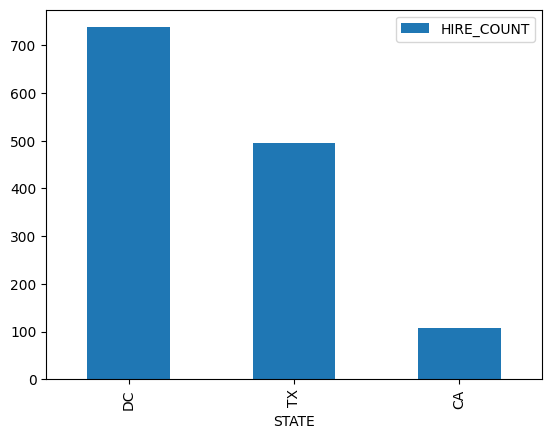

In [36]:
#Which of the top 3 States has the highest HIRE_COUNT
df_top_3.pivot_table(index = 'STATE', values = 'HIRE_COUNT', aggfunc = 'sum').sort_values(by = 'HIRE_COUNT', ascending = False).plot(kind = 'bar')

In [38]:
# Sum of HIRE_COUNT for California
ca_hire_count = df_top_3[df_top_3['STATE'] == 'CA']['HIRE_COUNT'].sum()
print(ca_hire_count)

108


In [39]:
# Sum of HIRE_COUNT for DC
dc_hire_count = df_top_3[df_top_3['STATE'] == 'DC']['HIRE_COUNT'].sum()
print(dc_hire_count)

738


In [40]:
# Sum of HIRE_COUNT for TX
tx_hire_count = df_top_3[df_top_3['STATE'] == 'TX']['HIRE_COUNT'].sum()
print(tx_hire_count)

496


In [ ]:
#confirm the amount of years the dataset spans for the top three states by subtracting the earliest RECEIVED_DATE from the latest the HIRED_DATE
data_timespan = df_top_3['RECEIVED_DATE'].max() - df_top_3['RECEIVED_DATE'].min()
print(data_timespan)


1938 days 00:00:00


In [37]:
#Convert the data time span to years
data_timespan_years = data_timespan.days / 365
print(data_timespan_years)

5.30958904109589


The fact that fewer than 1,000 people have been hired in each state over the span of five years highlights a significant concern. This issue arises from the removal of duplicates in the dataset—a decision that was justified due to the lack of sufficient information. Upon careful examination, the duplicates appeared to be true duplicates rather than distinct positions.

Had I been able to consult the data engineer, I would have inquired about the reason behind these duplicates, as they do not seem to represent different positions. One possible explanation is that the duplicates in California, for example, might represent positions in different within the same city. However, since this cannot be confirmed, given that the vacancy number is the same, I have proceeded with the dataset where duplicates have been removed.

CALIFORNIA STATS

In [ ]:
# The mean time to hire in Calfornia
df_top_3[df_top_3['STATE'] == 'CA']['TIME_TO_HIRE'].mean()


Timedelta('84 days 17:08:34.285714286')

In [ ]:
# The median time to hire in California
df_top_3[df_top_3['STATE'] == 'CA']['TIME_TO_HIRE'].median()

Timedelta('76 days 00:00:00')

DC STATS

In [ ]:
#

TEXAS

In [ ]:
#